Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3117
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1419
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1232
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1147
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1099
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1066
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1045
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1023
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1006
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0991
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0980
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0967
Epoch 13/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0963
Epoch 14/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0952
Epoch 15/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - lo

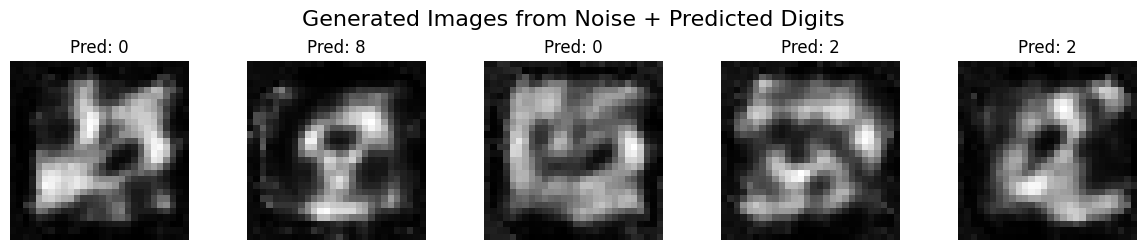

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Autoencoder Architecture 
latent_dim = 64

# Encoder
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(latent_dim, activation='relu')(x)

# Decoder
decoder_input = Input(shape=(latent_dim,))
x = Dense(128, activation='relu')(decoder_input)
x = Dense(256, activation='relu')(x)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# Models
encoder = Model(input_img, encoded, name="Encoder")
decoder = Model(decoder_input, decoded, name="Decoder")

# Full Autoencoder
autoencoder_input = Input(shape=(28, 28, 1))
encoded_img = encoder(autoencoder_input)
reconstructed_img = decoder(encoded_img)
autoencoder = Model(autoencoder_input, reconstructed_img)

# Compile and Train Autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True)

# Simple Classifier
input_cls = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_cls)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output_cls = Dense(10, activation='softmax')(x)

classifier = Model(inputs=input_cls, outputs=output_cls)
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Classifier on MNIST
classifier.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# Sample Noise Vectors 
mean = 0
std_dev = 1
noise_vectors = np.random.normal(loc=mean, scale=std_dev, size=(5, latent_dim))

# Show the sampled noise vectors
print("Sampled noise vectors (N({}, {})): \n".format(mean, std_dev))
for i, vec in enumerate(noise_vectors):
    print(f"Noise Vector {i+1}:")
    print(np.round(vec, 2))
    print()

# Generate Images from Decoder
generated_images = decoder.predict(noise_vectors)

# Predict Labels Using Classifier 
predicted_labels = classifier.predict(generated_images)
predicted_digits = np.argmax(predicted_labels, axis=1)

# Display the Generated Images with Predicted Labels
plt.figure(figsize=(12, 2.5))
for i, img in enumerate(generated_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}")
    plt.axis('off')
plt.suptitle("Generated Images from Noise + Predicted Digits", fontsize=16)
plt.tight_layout()
plt.show()
